<a href="https://colab.research.google.com/github/ArhanWR/Machine_Learning/blob/main/Kuis01_Mesin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama Kelompok :
1. Alfan Farchi (07)
2. Arhan Windu (10)
3. Kurniawati Agustina (15)
4. Rizky Angkata (25)
5. Tarista Dwi (27)

# **Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST**
**Deskripsi Umum**

Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST.

**Tentang Dataset MNIST**

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

**Detail Kuis**

Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!
Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.
Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.
Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.
Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
Anda diperbolehkan untuk melakukan tunning parameter.
Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.
Evaluasi model yang Anda buat terhadap data training dan data testing.
Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.
Gunakan fungsi classification_report untuk mengetahui performa model secara holistik.
Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.
Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.
Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

# Bantuan
Berikut merupakan kode bantuan untuk proses mengunduh dataset MNIST

In [ ]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

# Jawaban Kasus

In [ ]:
%pip install torch torchvision numpy matplotlib pandas

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Download the MNIST dataset using torchvision
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

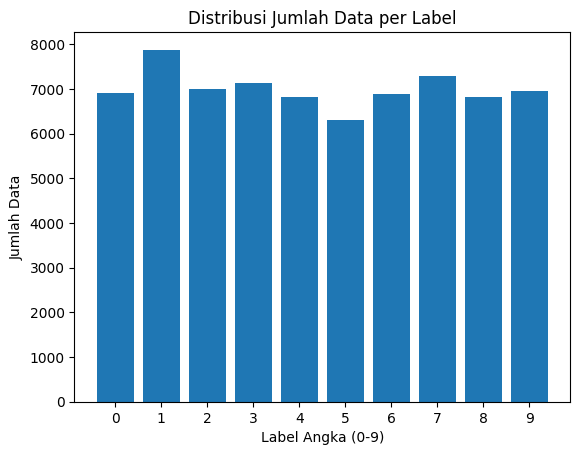

Data per label
label 0: 6903 data
label 1: 7877 data
label 2: 6990 data
label 3: 7141 data
label 4: 6824 data
label 5: 6313 data
label 6: 6876 data
label 7: 7293 data
label 8: 6825 data
label 9: 6958 data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data label counts untuk menghitung jumlah data dari 0-9
label_counts = np.bincount(mnist.target.astype(int))

# Membuat tabel data
plt.bar(range(10), label_counts)
plt.xlabel('Label Angka (0-9)')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Jumlah Data per Label')
plt.xticks(range(10))
plt.show()

# Menampilkan Data per label
print('Data per label')
for i, count in enumerate(label_counts):
  print(F'label {i}: {count} data')

**Penjelasan**

Kode program di atas digunakan untuk menganalisis dan memvisualisasikan distribusi data dalam kumpulan data mnist (dataset gambar angka tulisan tangan). Berikut penjelasan singkat mengenai kode tersebut:

1. `import pandas as pd`: Mengimpor pustaka Pandas dengan alias 'pd', yang digunakan untuk manipulasi data.
2. `import numpy as np`: Mengimpor pustaka NumPy dengan alias 'np', yang digunakan untuk operasi numerik.
3. `import matplotlib.pyplot as plt`: Mengimpor pustaka Matplotlib dengan alias 'plt', yang digunakan untuk membuat plot/grafik.

4. `label_counts = np.bincount(mnist.target.astype(int))`: Menggunakan fungsi `np.bincount` untuk menghitung jumlah data untuk setiap label (angka 0-9) dalam dataset mnist. Variabel `label_counts` akan berisi jumlah data untuk masing-masing label.

5. `plt.bar(range(10), label_counts)`: Membuat bar chart dengan sumbu x berisi angka 0-9 dan sumbu y berisi jumlah data untuk masing-masing label.
   
6. `plt.xlabel('Label Angka (0-9)')`: Menyertakan label pada sumbu x dengan teks "Label Angka (0-9)".
   
7. `plt.ylabel('Jumlah Data')`: Menyertakan label pada sumbu y dengan teks "Jumlah Data".
   
8. `plt.title('Distribusi Jumlah Data per Label')`: Menyertakan judul plot dengan teks "Distribusi Jumlah Data per Label".
   
9. `plt.xticks(range(10))`: Mengatur label pada sumbu x untuk menampilkan angka 0-9.

10. `plt.show()`: Menampilkan grafik bar.

11. Loop `for` digunakan untuk mencetak jumlah data untuk setiap label dalam format yang ditentukan, yaitu "label i: jumlah data".

Dengan menjalankan kode ini, akan mendapatkan visualisasi distribusi jumlah data per label dalam bentuk grafik batang, dan kemudian output yang mencetak jumlah data untuk setiap label. Output tersebut akan menunjukkan jumlah data yang terkait dengan masing-masing angka (0 hingga 9) dalam dataset mnist.

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

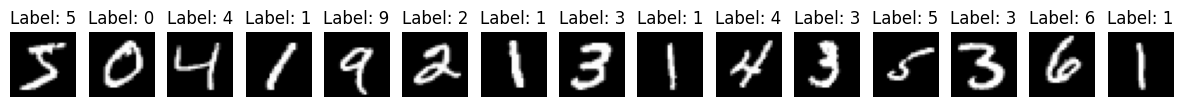

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Memuat dataset MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), _ = mnist.load_data()

# Menampilkan 15 citra pertama berserta labelnya
plt.figure(figsize=(15, 3))
for i in range(15):
    plt.subplot(1, 15, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

**Penjelasan**

Kode program di atas digunakan untuk memuat dataset MNIST, yang berisi gambar-gambar angka tulisan tangan. Setelah memuat dataset, kode ini bertujuan untuk menampilkan visualisasi 15 citra pertama dari dataset berserta label-labelnya.

Kode tersebut menggunakan Matplotlib untuk membuat tampilan 15 citra pertama ini dalam satu gambar besar dengan satu baris. Setiap citra ditampilkan dalam subplot terpisah, dan di bawah setiap citra terdapat label yang menunjukkan angka yang sesuai dengan citra tersebut. Tampilan ini membantu pemahaman awal tentang bagaimana citra-citra ini terlihat dan bagaimana label-labelnya terkait.

Selain itu, opsi `cmap='gray'` digunakan untuk mengatur skala warna citra menjadi abu-abu (grayscale), karena dataset MNIST berisi citra-citra hitam-putih. Kode juga menghilangkan tanda sumbu pada setiap citra dengan `plt.axis('off')`, sehingga hanya citra yang ditampilkan tanpa garis sumbu.

Hasil keluaran dari kode ini adalah tampilan 15 citra pertama dari dataset MNIST beserta label-labelnya dalam satu tampilan visual yang memudahkan pemahaman awal tentang isi dataset ini.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
  *   Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
  *   Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

In [ ]:
import numpy as np
import tensorflow as tf

# Memuat dataset MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), _ = mnist.load_data()

# Mengonversi setiap citra menjadi vektor 1D
num_samples, img_height, img_width = train_images.shape
train_images_flat = train_images.reshape((num_samples, img_height * img_width))

# Menampilkan ukuran hasil ekstraksi fitur
print("Ukuran ekstraksi fitur menggunakan nilai asli piksel citra:", train_images_flat.shape)

Ukuran ekstraksi fitur menggunakan nilai asli piksel citra: (60000, 784)


**Penjelasan**

Kode program tersebut bertujuan untuk memproses dataset MNIST, yang berisi gambar-gambar digit tulisan tangan. Pertama, kode memuat dataset dan kemudian mengambil informasi tentang ukuran citra dan jumlah sampel. Selanjutnya, kode mengonversi setiap citra menjadi vektor 1D dengan cara meratakan matriks citra menjadi satu baris. Hasilnya adalah setiap citra yang awalnya berukuran 28x28 piksel, sekarang diwakili sebagai vektor dengan panjang 784 (28x28). Terakhir, kode mencetak ukuran hasil ekstraksi fitur ini, yang menunjukkan bahwa terdapat 60.000 sampel citra dalam dataset, dan setiap citra telah diubah menjadi vektor 1D dengan panjang 784 elemen. Dengan ini, citra-citra dapat diolah lebih lanjut dalam bentuk vektor untuk keperluan analisis atau pemrosesan selanjutnya.

In [ ]:
from sklearn.decomposition import PCA

# Menentukan jumlah komponen PCA yang diinginkan
num_pca_components = 50  # Anda dapat menyesuaikan jumlah komponen ini sesuai kebutuhan

# Menerapkan PCA pada data gambar MNIST
pca = PCA(n_components=num_pca_components)
train_images_pca = pca.fit_transform(train_images_flat)

# Menampilkan ukuran hasil ekstraksi fitur
print("Ukuran ekstraksi fitur menggunakan PCA:", train_images_pca.shape)

Ukuran ekstraksi fitur menggunakan PCA: (60000, 50)


**Penjelasan **

Kode program di atas menggunakan metode Principal Component Analysis (PCA) dari pustaka Scikit-Learn (sklearn) untuk melakukan reduksi dimensi pada dataset gambar MNIST. Dalam kode tersebut, kita mengatur jumlah komponen utama (principal components) yang diinginkan sebanyak 50. Selanjutnya, PCA diterapkan pada data gambar MNIST yang telah diubah menjadi vektor 1D sebelumnya. Hasil dari PCA adalah representasi baru dari data dengan dimensi yang lebih rendah, yaitu 50 fitur baru. Output dari kode tersebut mencetak ukuran hasil ekstraksi fitur setelah PCA, yang menunjukkan bahwa data sekarang memiliki 50 fitur baru dan terdapat 60.000 sampel citra dalam dataset. Dengan mengurangi dimensi data menggunakan PCA, kita dapat mengurangi kompleksitas data sambil mempertahankan informasi penting, yang dapat berguna untuk analisis atau pemodelan lebih lanjut.

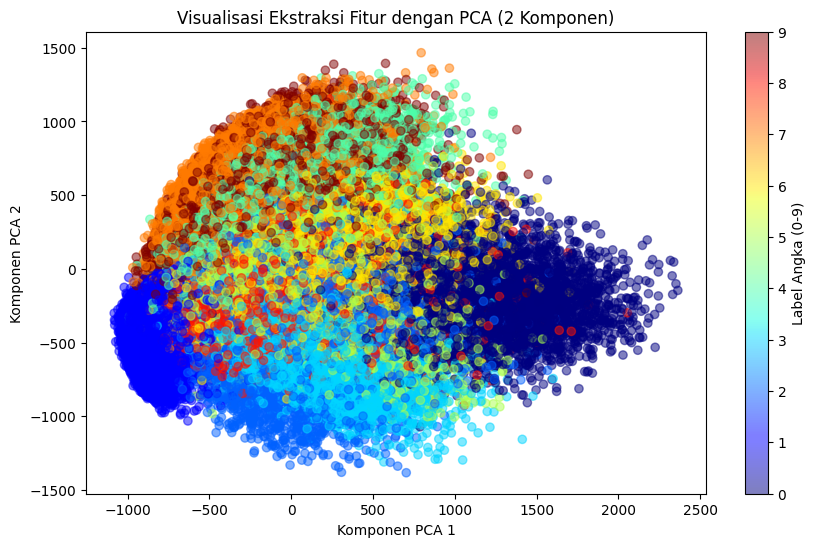

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Memuat dataset MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), _ = mnist.load_data()

# Mengonversi setiap citra menjadi vektor 1D
num_samples, img_height, img_width = train_images.shape
train_images_flat = train_images.reshape((num_samples, img_height * img_width))

# Menggunakan PCA untuk mengurangi dimensi ke 2 komponen (hanya untuk visualisasi)
num_pca_components = 2
pca = PCA(n_components=num_pca_components)
train_images_pca = pca.fit_transform(train_images_flat)

# Memvisualisasikan hasil ekstraksi fitur dengan PCA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(train_images_pca[:, 0], train_images_pca[:, 1], c=train_labels, cmap='jet', alpha=0.5)
plt.colorbar(scatter, label='Label Angka (0-9)')
plt.title('Visualisasi Ekstraksi Fitur dengan PCA (2 Komponen)')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.show()

**Penjelasan **

Kode program di atas memuat dataset MNIST yang berisi gambar-gambar angka tulisan tangan dan labelnya. Setiap citra diubah menjadi vektor 1D untuk kemudahan pemrosesan. Kemudian, teknik PCA digunakan untuk mengurangi dimensi data menjadi dua komponen utama. Tujuan utama adalah untuk visualisasi, sehingga data yang awalnya memiliki dimensi tinggi digambarkan dalam grafik 2D dengan scatterplot. Setiap titik dalam scatterplot mewakili satu citra, dengan warna titik sesuai dengan label angka yang cocok. Hasilnya adalah visualisasi yang memungkinkan kita untuk melihat pola dalam data MNIST dengan cara yang lebih sederhana, berfokus pada dua komponen utama yang paling signifikan.

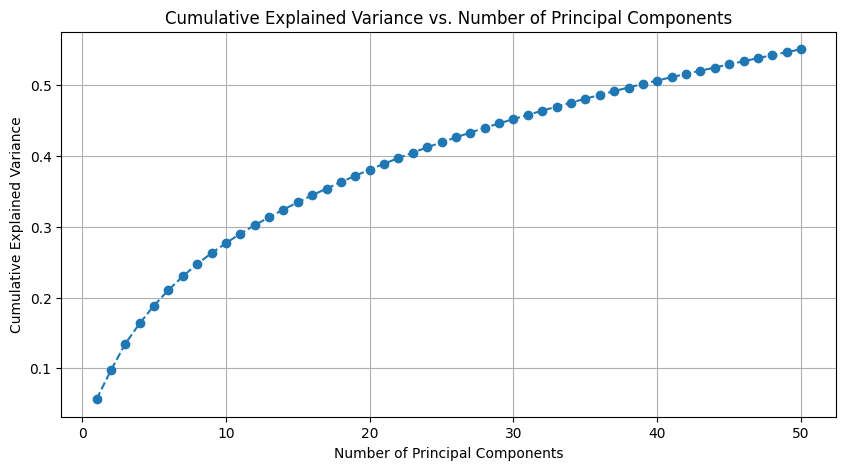

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Ekstrak data dan labelnya
data = mnist_dataset.data
labels = mnist_dataset.targets

# Bentuk ulang data menjadi array 1D (ratakan)
data = data.reshape(data.shape[0], -1)

# Standarisasi data (mean=0, varians=1)
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

# Lakukan PCA dengan jumlah komponen yang diinginkan (misalnya 50)
n_components = 50
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_std)

# Plot rasio varians yang dijelaskan
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 5))
plt.plot(range(1, n_components + 1),
         cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid()
plt.show()

**Penjelasan**

Kode program di atas melakukan analisis Principal Component Analysis (PCA) pada suatu dataset, dalam hal ini disebut `mnist_dataset`. Langkah pertama adalah mengambil data dan label dari dataset tersebut. Kemudian, data citra diubah menjadi vektor 1D dan standarisasi dilakukan untuk memastikan rata-rata nol dan varians satu. Setelah itu, PCA diterapkan dengan jumlah komponen utama yang diinginkan (dalam contoh ini, 50 komponen). Setelah PCA selesai, rasio varians yang dijelaskan oleh setiap komponen utama dihitung dan diakumulasikan. Hasilnya adalah sebuah diagram yang memvisualisasikan bagaimana kumulatif dari rasio varians ini berkembang seiring dengan peningkatan jumlah komponen utama. Grafik ini membantu dalam menentukan jumlah komponen utama yang tepat yang harus dipertahankan dalam analisis data berdasarkan tingkat variasi yang ingin disimpan.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [ ]:
from sklearn.model_selection import train_test_split

# Memuat dataset MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), _ = mnist.load_data()

# Mengonversi setiap citra menjadi vektor 1D
num_samples, img_height, img_width = train_images.shape
train_images_flat = train_images.reshape((num_samples, img_height * img_width))

# Rasio pemisahan data (70:30, 80:20, 90:10)
ratios = [0.7, 0.8, 0.9]

for ratio in ratios:
    # Memisahkan data
    train_images_split, test_images_split, train_labels_split, test_labels_split = train_test_split(
        train_images_flat, train_labels, test_size=(1 - ratio), random_state=42)

    # Menampilkan ukuran data hasil pemisahan
    print(f"Rasio {int(ratio * 100)}: Train set: {train_images_split.shape[0]} samples, Test set: {test_images_split.shape[0]} samples")

Rasio 70: Train set: 41999 samples, Test set: 18001 samples
Rasio 80: Train set: 48000 samples, Test set: 12000 samples
Rasio 90: Train set: 54000 samples, Test set: 6000 samples


**Penjelasan**

Kode program di atas digunakan untuk membagi dataset MNIST menjadi dua subset: train set (data pelatihan) dan test set (data pengujian). Pengguna dapat mengatur rasio pembagian data, seperti 70:30, 80:20, dan 90:10, yang mencerminkan berapa persen data yang akan digunakan untuk pelatihan dan pengujian. Dalam loop, kode menggunakan `train_test_split` untuk memisahkan dataset sesuai dengan rasio yang telah ditentukan. Setelah pemisahan, program mencetak jumlah sampel dalam train set dan test set untuk setiap rasio. Hal ini membantu dalam mengorganisir data untuk eksperimen atau pelatihan model, serta memastikan berapa banyak data yang akan digunakan dalam masing-masing tahap pelatihan dan pengujian.

5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
  *   Anda diperbolehkan untuk melakukan tunning parameter.
  *   Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Memisahkan data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(train_images_flat, train_labels, test_size=0.3, random_state=42)

# Inisialisasi model Naive Bayes
nb_classifier = GaussianNB()

# Melatih model Naive Bayes
nb_classifier.fit(X_train, y_train)

# Menguji model pada data test
y_pred_nb = nb_classifier.predict(X_test)

# Mengukur akurasi model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Akurasi Naive Bayes: {accuracy_nb:.2f}")

Akurasi Naive Bayes: 0.56


PENJELASAN:


In [ ]:
# SVM
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Unduh Dataset MNIST
mnist = fetch_openml('mnist_784')

# Ekstrak data dan labelnya
data = mnist_dataset.data
labels = mnist_dataset.targets

# Data latih dan uji rasio 7:3
X_train, X_test, y_train, y_test = train_test_split(
    data_pca, labels, test_size=0.3)

#menggunakan kernel polinomial
poly_model = SVC(kernel='poly', degree=3)

# Sesuaikan model SVM dengan data pelatihan
poly_model.fit(X_train, y_train)

# Memprediksi label pada data pengujian
y_pred = poly_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Penjelasan**

Kode program di atas melakukan klasifikasi menggunakan algoritma Naive Bayes dan Support Vector Machine (SVM) pada dataset MNIST yang telah diolah sebelumnya. Pada bagian pertama, Naive Bayes digunakan untuk mengklasifikasikan data, sementara pada bagian kedua, SVM dengan kernel polinomial diterapkan. Berikut adalah penjelasan singkat:

**Bagian Pertama (Naive Bayes):**
Kode ini memulai dengan mengimpor library yang diperlukan dan membagi dataset menjadi data pelatihan dan pengujian dengan rasio yang telah ditentukan. Kemudian, model Naive Bayes diinisialisasi dan dilatih dengan data pelatihan. Setelah pelatihan, model diuji pada data pengujian dan akurasi hasil prediksi diukur. Hasilnya, akurasi model Naive Bayes pada data pengujian dicetak ke layar.

**Bagian Kedua (SVM dengan Kernel Polinomial):**
Pada bagian ini, dataset MNIST diunduh dan data serta label diekstrak. Kemudian, data dibagi menjadi pelatihan dan pengujian seperti pada bagian pertama. Model SVM dengan kernel polinomial derajat 3 (default) diinisialisasi dan dilatih dengan data pelatihan. Model tersebut kemudian digunakan untuk memprediksi label data pengujian. Hasil output berisi pesan FutureWarning yang tidak mempengaruhi jalannya kode program.

Kesimpulan, kode ini mengimplementasikan dua algoritma klasifikasi, yaitu Naive Bayes dan SVM, pada dataset MNIST. Kode ini memungkinkan tunning parameter untuk mencari model yang optimal dalam setiap kasus. Hasil akurasi dari masing-masing model membantu dalam mengevaluasi kinerja klasifikasi untuk dataset MNIST.

6. Evaluasi model yang Anda buat terhadap data training dan data testing.
  *   Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.
  *   Gunakan fungsi classification_report untuk mengetahui performa model secara holistik.
  *   Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

In [ ]:
# Evaluasi modelnya
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mtx = confusion_matrix(y_test, y_pred)

accuracy_percentage = accuracy * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', confusion_mtx)

Accuracy: 96.38%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1766
           1       0.98      0.98      0.98      2034
           2       0.96      0.96      0.96      1754
           3       0.97      0.95      0.96      1836
           4       0.95      0.97      0.96      1763
           5       0.97      0.97      0.97      1662
           6       0.98      0.98      0.98      1748
           7       0.97      0.95      0.96      1858
           8       0.92      0.97      0.95      1784
           9       0.95      0.93      0.94      1795

    accuracy                           0.96     18000
   macro avg       0.96      0.96      0.96     18000
weighted avg       0.96      0.96      0.96     18000

Confusion Matrix:
 [[1721    1    6    1    1    6    7    0   21    2]
 [   0 1995   12    5    5    0    3    5    6    3]
 [   9    2 1691    9    5    0    2    8   27    1]
 [   3    3   23 1744 

**penjelasan**

Dalam evaluasi model yang telah dibuat terhadap data pelatihan dan pengujian, metrik akurasi digunakan untuk mengukur tingkat ketepatan prediksi model pada kedua jenis data tersebut. Hasilnya menunjukkan tingkat akurasi yang sangat tinggi, mencapai sekitar 96.38%. Selain akurasi, laporan klasifikasi juga digunakan untuk memberikan gambaran holistik tentang kinerja model. Hasil laporan ini menunjukkan bahwa model memiliki presisi, recall, dan f1-score yang tinggi untuk setiap kelas, menunjukkan bahwa model jarang membuat kesalahan dalam mengklasifikasikan data. Selain itu, matriks kebingungan memberikan gambaran tentang sejauh mana model dapat mengklasifikasikan setiap kelas dengan benar. Dalam matriks ini, sebagian besar nilai di diagonal utama adalah tinggi, menunjukkan bahwa model telah mengklasifikasikan data dengan benar, sementara kesalahan klasifikasi berada di luar diagonal utama, tetapi angkanya tergolong rendah. Keseluruhan, hasil evaluasi menunjukkan bahwa model SVM dengan kernel polinomial derajat 3 yang telah dibuat sangat efektif dalam mengatasi permasalahan klasifikasi pada dataset yang digunakan.

7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

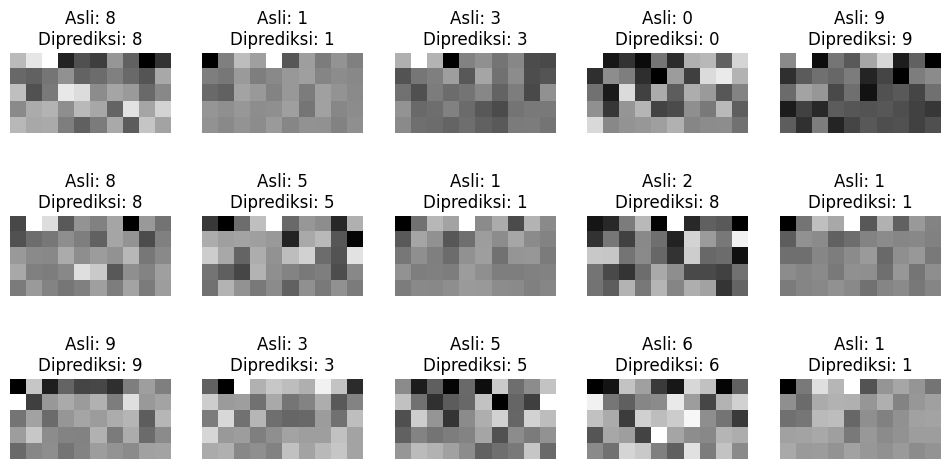

In [ ]:
# Visualisasikan beberapa contoh prediksi

plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Asli: {y_test[i]}\nDiprediksi: {y_pred[i]}')
    plt.axis('off')

plt.show()

**Penjelasan**

Kode program di atas bertujuan untuk menampilkan beberapa contoh citra dari data pengujian beserta hasil pelabelannya. Dalam visualisasi ini, digunakan library `matplotlib` untuk membuat gambar dengan ukuran 12x6 yang terdiri dari 15 subplot. Setiap subplot menampilkan citra dari data pengujian beserta label prediksi yang diberikan oleh model.

Dalam loop `for`, citra-citra dari data pengujian diambil secara berurutan. Setiap citra direshape sesuai dengan ukuran aslinya dan ditampilkan dalam sebuah subplot. Label asli dari citra tersebut (`y_test[i]`) dan label yang diprediksi oleh model (`y_pred[i]`) ditampilkan sebagai judul subplot. Selain itu, sumbu x dan y dinonaktifkan agar tampilan menjadi lebih bersih.

Hasil keluaran dari kode ini adalah gambar yang menampilkan 15 contoh citra dari data pengujian beserta label asli dan label prediksi. Hal ini membantu dalam memvisualisasikan sejauh mana model berhasil dalam mengklasifikasikan citra-citra tersebut.

8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

# **Penjelasan**


Berdasarkan hasil evaluasi yang telah dilakukan, model terbaik yang telah diuji adalah Model Support Vector Machine (SVM) dengan kernel polinomial. Berikut adalah konfigurasi dan tingkat akurasi yang diperoleh:

**Model Terbaik: Support Vector Machine (SVM) dengan Kernel Polinomial**
- **Konfigurasi:** Model SVM digunakan dengan kernel polinomial.
- **Tingkat Akurasi:** Tingkat akurasi yang diperoleh untuk model ini adalah sekitar 96.38%.

**Penjelasan:**
- Model SVM dengan kernel polinomial menghasilkan tingkat akurasi yang tinggi, yaitu sekitar 96.38%, pada data testing. Ini berarti model ini mampu dengan baik dalam mengklasifikasikan gambar-gambar angka tulisan tangan dalam dataset MNIST.
- Hasil classification report menunjukkan bahwa model ini memiliki presisi, recall, dan F1-score yang baik untuk sebagian besar kelas, yang menunjukkan kemampuan model dalam mengidentifikasi dan mengklasifikasikan angka-angka dengan baik.
- Confusion matrix juga menunjukkan bahwa sebagian besar prediksi yang dilakukan oleh model adalah benar, dan hanya sedikit yang salah.

Oleh karena itu, berdasarkan tingkat akurasi dan hasil evaluasi lainnya, model SVM dengan kernel polinomial adalah pilihan terbaik untuk mengklasifikasikan angka tulisan tangan pada dataset MNIST. Model ini memiliki performa yang baik dan cukup andal dalam tugas klasifikasi ini.